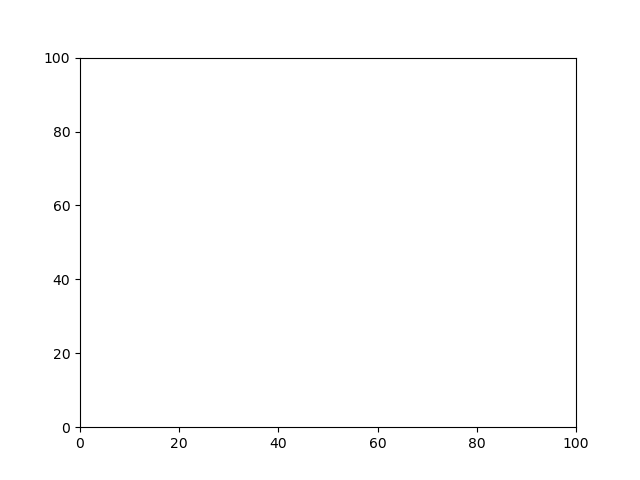

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as sc

# Box dimensions
box_size = 100

# Number of particles
num_particles = 4

# Time parameters
t_max = 100  # Total simulation time
dt = 0.1     # Time step

# Initialize positions and velocities
np.random.seed(0)  # For reproducibility
positions = np.random.rand(num_particles, 2) * (box_size -2)
velocities = (np.random.rand(num_particles, 2) - 0.5) * 10
# Particle colision
def particle_colision(t, position_i, V_i, positin_j, V_j):
    return (positin_j[0] + V_j[0] * t - position_i[0] - V_i[0] * t)**2 + (positin_j[1] + V_j[1] * t - position_i[1] - V_i[1] * t)**2 - 4

  
# Function to update positions
def update_positions(positions, velocities, dt):
    positions += velocities * dt
    
    # Check for boundary collisions and reflect velocities
    for i in range(num_particles):
        for j in range(2):  # x and y directions
            if positions[i, j] <= 2 or positions[i, j] >= (box_size-2):
                velocities[i, j] *= -1
                positions[i, j] = np.clip(positions[i, j], 0, box_size)
    
    return positions

# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
particles, = ax.plot([], [], 'bo', ms=10)

def init():
    particles.set_data([], [])
    return particles,

def animate(frame):

    global positions
    positions = update_positions(positions, velocities, dt)
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,init

# Animation
ani = animation.FuncAnimation(fig, animate, frames=int(t_max/dt), init_func=init,
                              interval=20, blit=True, repeat=False)

plt.show()


[[54.68609638 70.65817917]
 [59.8652841  54.30878557]
 [42.67086074 64.00583485]
 [44.00837228 87.61020808]
 [94.51162501 38.81038581]
 [78.00560366 52.7739123 ]
 [56.53227787 90.85727728]
 [ 8.81946159 10.36441277]
 [ 3.94096615 81.93150517]
 [76.70304809 85.52116623]
 [95.94736085 78.71922216]
 [46.30201878 76.93080092]]


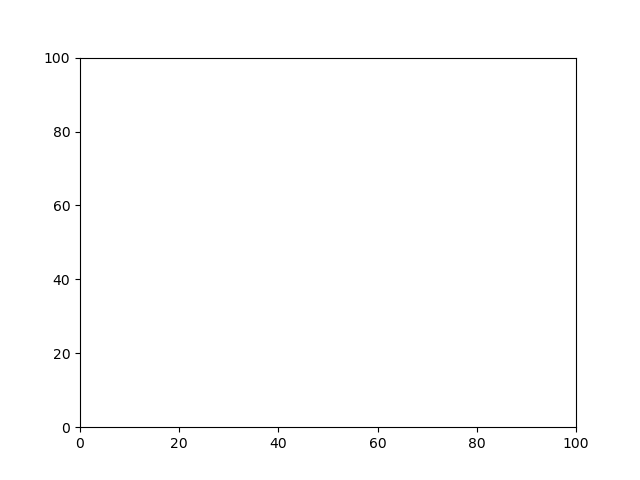

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}
Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}
Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}


10 position of wall colision [98.         80.84366364] and new v:[-2.50150073  2.55956804]
8 position of wall colision [ 2.         81.05310093] and new v:[ 2.10738149 -0.94452069]
3 position of wall colision [35.07325776 98.        ] and new v:[-3.53166582 -4.11350534]
6 position of wall colision [63.3925361 98.       ] and new v:[ 1.68143584 -1.75400995]
for 2, 5 collision at position[44.04730501 58.62953707] and [47.68936108 60.18494861], dist3.9602875550500687
for 0, 3 collision at position[23.36551302 82.13869897] and [24.69016025 85.9062943 ], dist3.9936781072412977
for 4, 9 collision at position[90.67039411 44.80519973] and [94.01554085 46.99691755], dist3.999204137661291
for 0, 8 collision at position[15.64000007 79.28549847] and [13.75918872 75.78267546], dist3.9758295153052523
1 position of wall colision [24.77124758 98.        ] and new v:[-5.34970069 -6.67003376]
9 position of wall colision [98.         40.91007373] and new v:[-3.92467917 -5.96749393]
10 position of wall co

In [2]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
box_size = 100

# Number of particles
num_particles = 12
particle_radius = 2.0  # Radius of the particles
large_num = 100 # A large number for no collision
epsilon = 1e-5  # Small threshold to avoid repeated collisions

# Time parameters
t_max = 15 # Total simulation time
dt = 0.01     # Time step

# Initialize positions and velocities
np.random.seed(0)  # For reproducibility
positions = np.random.rand(num_particles, 2) * (box_size - 2 * particle_radius) + particle_radius
print(positions)
velocities = (np.random.rand(num_particles, 2) - 0.5) * 15 

Temp = np.mean(velocities[:,0]**2 + velocities[:,1]**2)
pressure = 0
large_num = 100
import math
# def particle_colision_time(position_i, V_i, positin_j, V_j):
#     delta_x = positin_j[0] - position_i[0]
#     delta_vx = V_j[0] - V_i[0]
#     delta_y = positin_j[1] - position_i[1]
#     delta_yv = V_j[1] - V_i[1]
#     # The colision equation is: (\delta_vx^2 + \delta_vy^2)*t^2 + (2\deltax*\delta_vx + 2*\deltay*\delta_vy)*t + (\deltax^2 + \deltay^2) = 4
#     # ax^2 + bx + c = 0
#     a = delta_vx**2 + delta_yv**2
#     b = 2 * (delta_x * delta_vx + delta_y * delta_yv)
#     c = delta_x**2 + delta_y**2 - particle_radius
#     Delta = b**2 - 4 * a * c
#     if a == 0:
#         return large_num
#     if Delta < 0:
#         return large_num
#     elif Delta == 0:
#         t = -1 * b / (2 * a)
#         if t >= 0:
#             return t
#         else:
#             return large_num
#     else:
#         t1 = (-1 * b + math.sqrt(Delta)) / (2 * a)
#         t2 = (-1 * b - math.sqrt(Delta)) / (2 * a)
#         if t1 < 0 and t2 < 0:
#             # print('colision occured in negative time')
#             return large_num
#         elif t1 < 0 and t2 >= 0:
#             return t2
#         elif t2 < 0 and t1 >= 0:
#             return t1
#         elif t2 >= 0 and t1 >= 0:
#             # print(f'were here and t1:{t1} and t2:{t2}' )
#             return min(t1, t2)

# Function to update positions and velocities
def update_positions(positions, velocities, dt):
    # Update positions
    positions += velocities * dt
    
    # Check for boundary collisions and reflect velocities
    for i in range(num_particles):
        for j in range(2):  # x and y directions
            if positions[i, j] <= particle_radius or positions[i, j] >= box_size - particle_radius:
                velocities[i, j] *= -1
                #pressure += 1
                positions[i, j] = np.clip(positions[i, j], particle_radius, box_size - particle_radius)
                print(f'{i} position of wall colision {positions[i]} and new v:{velocities[i]}')
    # Check for particle collisions
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            dist = np.linalg.norm(positions[i] - positions[j])
            if dist <= 2 * particle_radius:  # Collision condition
                print(f'for {i}, {j} collision at position{positions[i]} and {positions[j]}, dist{dist}')
                resolve_collision(i, j, positions, velocities)
    
    return positions

# Function to resolve elastic collision between two particles
def resolve_collision(i, j, positions, velocities):
    # Calculate the normal vector
    delta_pos = positions[i] - positions[j]
    dist = np.linalg.norm(delta_pos)
    delta_v = velocities[i] - velocities[j]
    # Normal vector
    n_hat = delta_pos / (dist**2)
    #print(f'dist is {dist}')
    # Relative velocity
    
    
    # Velocity component along the normal direction
    v_rel = np.dot(delta_v, delta_pos)
    
    # Update velocities if particles are moving towards each other
    if v_rel < 0:
        velocities[i] -= v_rel * n_hat
        velocities[j] += v_rel * n_hat
    #print(f'({i},{j}) new i: p:{positions[i]}, v:{velocities[i]}\n and j: p:{positions[j]},v:{velocities[j]}')

# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
particles, = ax.plot([], [], 'bo', ms=10)

def init():
    particles.set_data([], [])
    return particles,

def animate(frame):
    global positions
    
    positions = update_positions(positions, velocities, dt)
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Animation
ani = animation.FuncAnimation(fig, animate, frames=int(t_max/dt), init_func=init,
                              interval=20, blit=True, repeat=False)

plt.show()


    

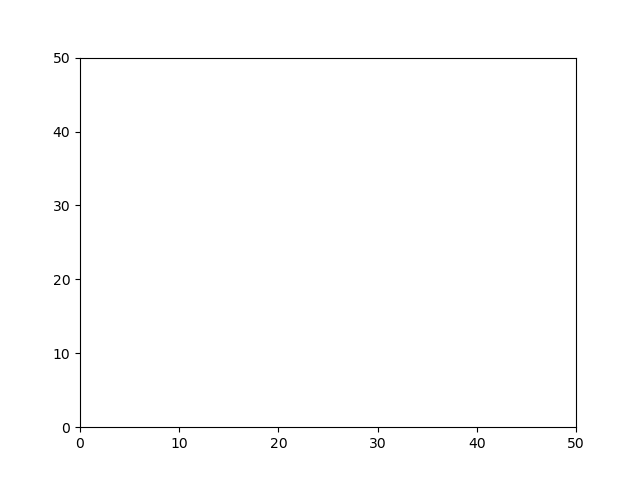

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}
Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}
Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}
Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}


In [3]:

%matplotlib ipympl
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Box dimensions
box_size = 50

# Number of particles
num_particles = 8
particle_radius = 1.0  # Radius of the particles
large_num = 1000  # A large number for no collision

# Time parameters
t_max = 100 # Total simulation time
dt = 0.1     # Time step

# Initialize positions and velocities
np.random.seed(0)  # For reproducibility
positions = np.random.rand(num_particles, 2) * (box_size - 2 * particle_radius) + particle_radius
velocities = (np.random.rand(num_particles, 2) - 0.5) * 8  # random velocities between (-1, 1)

# Function to compute the time to the first collision between two particles
def particle_collision_time(pos_i, vel_i, pos_j, vel_j):
    delta_x = pos_j[0] - pos_i[0]
    delta_vx = vel_j[0] - vel_i[0]
    delta_y = pos_j[1] - pos_i[1]
    delta_vy = vel_j[1] - vel_i[1]
    
    a = delta_vx**2 + delta_vy**2
    b = 2 * (delta_x * delta_vx + delta_y * delta_vy)
    c = delta_x**2 + delta_y**2 - 4 * particle_radius**2  # Adjusting for radius
    
    if a == 0:
        return large_num  # Particles moving parallel (no collision)
    
    Delta = b**2 - 4 * a * c
    if Delta < 0:
        return large_num  # No real roots, no collision
    elif Delta == 0:
        t = -b / (2 * a)
        return t if t >= 0 else large_num
    else:
        t1 = (-b + math.sqrt(Delta)) / (2 * a)
        t2 = (-b - math.sqrt(Delta)) / (2 * a)
        if t1 >= 0 and t2 >= 0:
            return min(t1, t2)
        elif t1 >= 0:
            return t1
        elif t2 >= 0:
            return t2
        return large_num

# Function to compute the time to collision with the walls
def wall_collision_time(position, velocity):
    times = []
    for i in range(2):  # x and y directions
        if velocity[i] > 0:
            t_wall = (box_size - particle_radius - position[i]) / velocity[i]
        elif velocity[i] < 0:
            t_wall = (particle_radius - position[i]) / velocity[i]
        else:
            t_wall = large_num  # No movement in this direction
        times.append(t_wall)
    
    return min(times)

# Function to find the next collision event
def find_earliest_collision(positions, velocities):
    min_time = large_num
    collision_pair = (-1, -1)  # (-1, -1) means wall collision
    
    # Check particle-particle collisions
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            t_collision = particle_collision_time(positions[i], velocities[i], positions[j], velocities[j])
            if t_collision < min_time:
                min_time = t_collision
                collision_pair = (i, j)
    
    # Check particle-wall collisions
    for i in range(num_particles):
        t_wall = wall_collision_time(positions[i], velocities[i])
        if t_wall < min_time:
            min_time = t_wall
            collision_pair = (i, -1)  # Indicate wall collision for this particle
    
    return min_time, collision_pair

# Function to resolve the collision (particles or walls)
def resolve_collision(collision_pair, positions, velocities):
    i, j = collision_pair
    if j == -1:  # Wall collision
        if positions[i][0] <= particle_radius or positions[i][0] >= box_size - particle_radius:
            velocities[i][0] *= -1  # Reverse x-velocity
        if positions[i][1] <= particle_radius or positions[i][1] >= box_size - particle_radius:
            velocities[i][1] *= -1  # Reverse y-velocity
        #print(f'({i}, {j})position of wall colision {positions[i]} and new v:{velocities[i]}')
    else:  # Particle-particle collision
        delta_pos = positions[i] - positions[j]
        dist = np.linalg.norm(delta_pos)
        n_hat = delta_pos / dist
        delta_v = velocities[i] - velocities[j]
        v_rel = np.dot(delta_v, n_hat)
        
        if v_rel < 0:  # Only resolve if they are moving towards each other
            velocities[i] -= v_rel * n_hat
            velocities[j] += v_rel * n_hat
        #print(f'({i}, {j}) new i: p:{positions[i]}, v:{velocities[i]}\n and j: p:{positions[j]},v:{velocities[j]}')
    

#t = 0
# while t < t_max:
#     delta_t, collision_pair = find_earliest_collision(positions, velocities)
#     positions += velocities * delta_t
#     resolve_collision(collision_pair, positions, velocities)
#     positions += velocities * 0.01
#     t += (delta_t + 0.01)
#     print(f'delta t is {delta_t}')
# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
particles, = ax.plot([], [], 'bo', ms=10)

def init():
    particles.set_data([], [])
    return particles,

def animate(frame):
    global positions, velocities, dt
    
    # Find the earliest collision
    delta_t, collision_pair = find_earliest_collision(positions, velocities)
    
    # Update positions to the collision time
    if delta_t < dt:
        
        positions += velocities * delta_t
        resolve_collision(collision_pair, positions, velocities)
        positions += velocities * 0.001
        #t += (delta_t + 0.01)
        #print(f'delta t is {delta_t}')
        dt -= (delta_t + 0.001)
    else:
        positions += velocities * dt
        dt = 0.1  # Reset time step after each update
    
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Animation
ani = animation.FuncAnimation(fig, animate, frames=int(t_max/dt), init_func=init,
                              interval=20, blit=True, repeat=False)

plt.show()


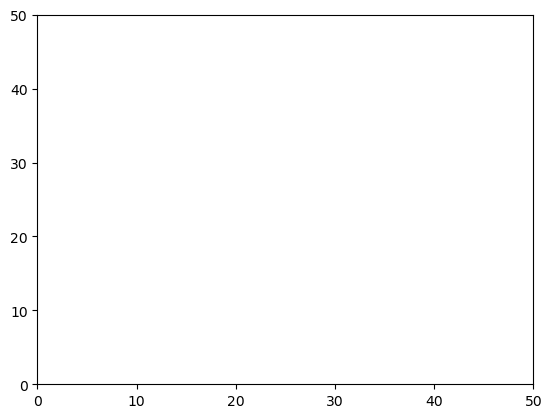

In [5]:

import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Box dimensions
box_size = 50

# Number of particles
num_particles = 4
particle_radius = 1.0  # Radius of the particles
large_num = 100 # A large number for no collision
epsilon = 1e-5  # Small threshold to avoid repeated collisions

# Time parameters
t_max = 15  # Total simulation time
dt = 0.1     # Time step

# Initialize positions and velocities
np.random.seed(0)  # For reproducibility
positions = np.random.rand(num_particles, 2) * (box_size - 2 * particle_radius) + particle_radius
velocities = (np.random.rand(num_particles, 2) - 0.5) * 15  # random velocities between (-1, 1)

# Function to compute the time to the first collision between two particles
def particle_collision_time(pos_i, vel_i, pos_j, vel_j):
    delta_x = pos_j[0] - pos_i[0]
    delta_vx = vel_j[0] - vel_i[0]
    delta_y = pos_j[1] - pos_i[1]
    delta_vy = vel_j[1] - vel_i[1]
    
    a = delta_vx**2 + delta_vy**2
    b = 2 * (delta_x * delta_vx + delta_y * delta_vy)
    c = delta_x**2 + delta_y**2 - 4 * particle_radius**2  # Adjusting for radius
    
    if a == 0:
        return large_num  # Particles moving parallel (no collision)
    
    Delta = b**2 - 4 * a * c
    if Delta < 0:
        return large_num  # No real roots, no collision
    elif Delta == 0:
        t = -b / (2 * a)
        return t if t >= 0 else large_num
    else:
        t1 = (-b + math.sqrt(Delta)) / (2 * a)
        t2 = (-b - math.sqrt(Delta)) / (2 * a)
        if t1 >= 0 and t2 >= 0:
            return min(t1, t2)
        elif t1 >= 0:
            return t1
        elif t2 >= 0:
            return t2
        return large_num

# Function to compute the time to collision with the walls
def wall_collision_time(position, velocity):
    times = []
    for i in range(2):  # x and y directions
        if velocity[i] > 0:
            t_wall = (box_size - particle_radius - position[i]) / velocity[i]
        elif velocity[i] < 0:
            t_wall = (particle_radius - position[i]) / velocity[i]
        else:
            t_wall = large_num  # No movement in this direction
        times.append(t_wall)
    
    return min(times)

# Function to find the next collision event
def find_earliest_collision(positions, velocities):
    min_time = large_num
    collision_pair = (-1, -1)  # (-1, -1) means wall collision
    
    # Check particle-particle collisions
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            t_collision = particle_collision_time(positions[i], velocities[i], positions[j], velocities[j])
            if t_collision < min_time and t_collision > epsilon:
                min_time = t_collision
                collision_pair = (i, j)
    
    # Check particle-wall collisions
    for i in range(num_particles):
        t_wall = wall_collision_time(positions[i], velocities[i])
        if t_wall < min_time and t_wall > epsilon:
            min_time = t_wall
            collision_pair = (i, -1)  # Indicate wall collision for this particle
    
    return min_time, collision_pair

# Function to resolve the collision (particles or walls)
def resolve_collision(collision_pair, positions, velocities):
    i, j = collision_pair
    if j == -1:  # Wall collision
        if positions[i][0] <= particle_radius or positions[i][0] >= box_size - particle_radius:
            velocities[i][0] *= -1  # Reverse x-velocity
        if positions[i][1] <= particle_radius or positions[i][1] >= box_size - particle_radius:
            velocities[i][1] *= -1  # Reverse y-velocity
    else:  # Particle-particle collision
        delta_pos = positions[i] - positions[j]
        dist = np.linalg.norm(delta_pos)
        n_hat = delta_pos / dist
        delta_v = velocities[i] - velocities[j]
        v_rel = np.dot(delta_v, n_hat)
        
        if v_rel < 0:  # Only resolve if they are moving towards each other
            velocities[i] -= v_rel * n_hat
            velocities[j] += v_rel * n_hat
            
        # Adjust positions slightly to avoid repeated collision
        overlap = 2 * particle_radius - dist
        if overlap > 0:
            positions[i] += 0.5 * overlap * n_hat
            positions[j] -= 0.5 * overlap * n_hat

# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
particles, = ax.plot([], [], 'bo', ms=10)

def init():
    particles.set_data([], [])
    return particles,

def animate(frame):
    global positions, velocities, dt
    
    # Find the earliest collision
    collision_time, collision_pair = find_earliest_collision(positions, velocities)
    
    # Update positions to the collision time
    if collision_time < dt:
        positions += velocities * collision_time
        resolve_collision(collision_pair, positions, velocities)
        dt -= collision_time
    else:
        positions += velocities * dt
        dt = 0.1  # Reset time step after each update
    
    #particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Animation
ani = animation.FuncAnimation(fig, animate, frames=int(t_max/dt), init_func=init,
                              interval=20, blit=True, repeat=False)

plt.show()


In [31]:
print(particle_colision([0,0], [-1,1], [2, 0], [1, 1]))

colision occured in negative time
100


In [8]:
np.min(positions[1,:])

14.028464975057249

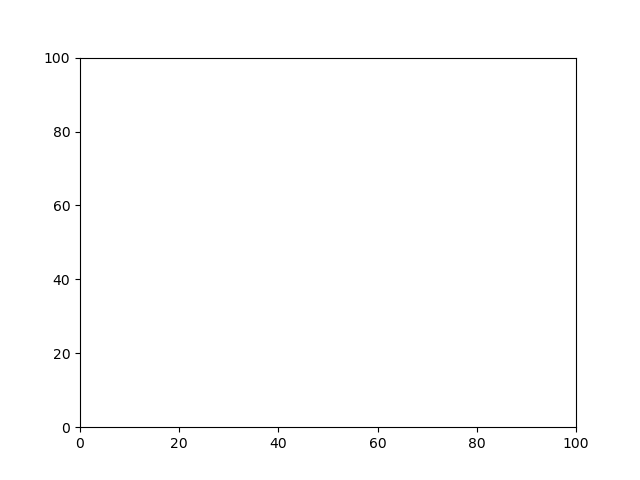

In [33]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Box dimensions
box_size = 100

# Number of particles
num_particles = 15

# Time parameters
t_max = 100  # Total simulation time
dt = 0.1     # Time step

# Initialize positions and velocities
np.random.seed(0)  # For reproducibility
positions = np.random.rand(num_particles, 2) * (box_size -2)
velocities = (np.random.rand(num_particles, 2) - 0.5) * 15

# Function to update positions
def update_positions(positions, velocities, dt):
    positions += velocities * dt
    
    # Check for boundary collisions and reflect velocities
    for i in range(num_particles):
        for j in range(2):  # x and y directions
            if positions[i, j] <= 0 or positions[i, j] >= (box_size-2):
                velocities[i, j] *= -1
                positions[i, j] = np.clip(positions[i, j], 0, box_size)
    
    return positions

# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
particles, = ax.plot([], [], 'bo', ms=10)

def init():
    particles.set_data([], [])
    return particles,

def animate(frame):

    global positions
    positions = update_positions(positions, velocities, dt)
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,init

# Animation
ani = animation.FuncAnimation(fig, animate, frames=int(t_max/dt), init_func=init,
                              interval=20, blit=True, repeat=False)

plt.show()

/home/bipar001/anaconda3/envs/tele_statistics/lib/python3.8/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


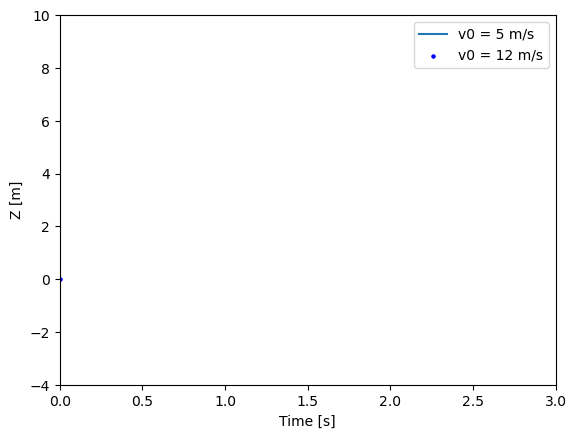

In [7]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    print(f'here')
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])conda install -c conda-forge ipympl
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

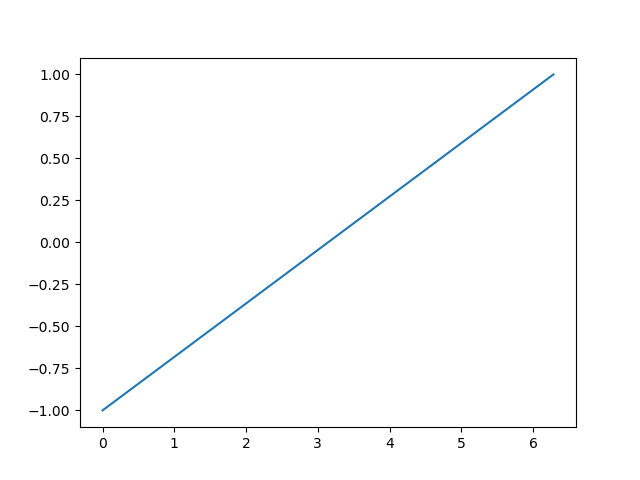

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}


In [2]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot([0,2*np.pi],[-1,1])

animate = lambda i: l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

plt.show()

In [ ]:
%matplotlib ipympl
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Box dimensions
box_size = 50

# Number of particles
num_particles = 4
particle_radius = 1.0  # Radius of the particles
large_num = 1000  # A large number for no collision

# Time parameters
t_max = 100 # Total simulation time
dt = 0.1     # Time step

# Initialize positions and velocities
np.random.seed(0)  # For reproducibility
positions = np.random.rand(num_particles, 2) * (box_size - 2 * particle_radius) + particle_radius
velocities = (np.random.rand(num_particles, 2) - 0.5) * 8  # random velocities between (-1, 1)

# Function to compute the time to the first collision between two particles
def particle_collision_time(pos_i, vel_i, pos_j, vel_j):
    delta_x = pos_j[0] - pos_i[0]
    delta_vx = vel_j[0] - vel_i[0]
    delta_y = pos_j[1] - pos_i[1]
    delta_vy = vel_j[1] - vel_i[1]
    
    a = delta_vx**2 + delta_vy**2
    b = 2 * (delta_x * delta_vx + delta_y * delta_vy)
    c = delta_x**2 + delta_y**2 - 4 * particle_radius**2  # Adjusting for radius
    
    if a == 0:
        return large_num  # Particles moving parallel (no collision)
    
    Delta = b**2 - 4 * a * c
    if Delta < 0:
        return large_num  # No real roots, no collision
    elif Delta == 0:
        t = -b / (2 * a)
        return t if t >= 0 else large_num
    else:
        t1 = (-b + math.sqrt(Delta)) / (2 * a)
        t2 = (-b - math.sqrt(Delta)) / (2 * a)
        if t1 >= 0 and t2 >= 0:
            return min(t1, t2)
        elif t1 >= 0:
            return t1
        elif t2 >= 0:
            return t2
        return large_num

# Function to compute the time to collision with the walls
def wall_collision_time(position, velocity):
    times = []
    for i in range(2):  # x and y directions
        if velocity[i] > 0:
            t_wall = (box_size - particle_radius - position[i]) / velocity[i]
        elif velocity[i] < 0:
            t_wall = (particle_radius - position[i]) / velocity[i]
        else:
            t_wall = large_num  # No movement in this direction
        times.append(t_wall)
    
    return min(times)

# Function to find the next collision event
def find_earliest_collision(positions, velocities):
    min_time = large_num
    collision_pair = (-1, -1)  # (-1, -1) means wall collision
    
    # Check particle-particle collisions
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            t_collision = particle_collision_time(positions[i], velocities[i], positions[j], velocities[j])
            if t_collision < min_time:
                min_time = t_collision
                collision_pair = (i, j)
    
    # Check particle-wall collisions
    for i in range(num_particles):
        t_wall = wall_collision_time(positions[i], velocities[i])
        if t_wall < min_time:
            min_time = t_wall
            collision_pair = (i, -1)  # Indicate wall collision for this particle
    
    return min_time, collision_pair

# Function to resolve the collision (particles or walls)
def resolve_collision(collision_pair, positions, velocities):
    i, j = collision_pair
    if j == -1:  # Wall collision
        if positions[i][0] <= particle_radius or positions[i][0] >= box_size - particle_radius:
            velocities[i][0] *= -1  # Reverse x-velocity
        if positions[i][1] <= particle_radius or positions[i][1] >= box_size - particle_radius:
            velocities[i][1] *= -1  # Reverse y-velocity
        #print(f'({i}, {j})position of wall colision {positions[i]} and new v:{velocities[i]}')
    else:  # Particle-particle collision
        delta_pos = positions[i] - positions[j]
        dist = np.linalg.norm(delta_pos)
        n_hat = delta_pos / dist
        delta_v = velocities[i] - velocities[j]
        v_rel = np.dot(delta_v, n_hat)
        
        if v_rel < 0:  # Only resolve if they are moving towards each other
            velocities[i] -= v_rel * n_hat
            velocities[j] += v_rel * n_hat
        #print(f'({i}, {j}) new i: p:{positions[i]}, v:{velocities[i]}\n and j: p:{positions[j]},v:{velocities[j]}')
    

#t = 0
# while t < t_max:
#     delta_t, collision_pair = find_earliest_collision(positions, velocities)
#     positions += velocities * delta_t
#     resolve_collision(collision_pair, positions, velocities)
#     positions += velocities * 0.01
#     t += (delta_t + 0.01)
#     print(f'delta t is {delta_t}')
# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
particles, = ax.plot([], [], 'bo', ms=10)

def init():
    particles.set_data([], [])
    return particles,

def animate(frame):
    global positions, velocities, dt
    
    # Find the earliest collision
    delta_t, collision_pair = find_earliest_collision(positions, velocities)
    
    # Update positions to the collision time
    if delta_t < dt:
        
        positions += velocities * delta_t
        resolve_collision(collision_pair, positions, velocities)
        positions += velocities * 0.001
        #t += (delta_t + 0.01)
        #print(f'delta t is {delta_t}')
        dt -= (delta_t + 0.001)
    else:
        positions += velocities * dt
        dt = 0.1  # Reset time step after each update
    
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Animation
ani = animation.FuncAnimation(fig, animate, frames=int(t_max/dt), init_func=init,
                              interval=20, blit=True, repeat=False)

plt.show()

[[54.68609638 70.65817917]
 [59.8652841  54.30878557]
 [42.67086074 64.00583485]
 [44.00837228 87.61020808]
 [94.51162501 38.81038581]
 [78.00560366 52.7739123 ]
 [56.53227787 90.85727728]
 [ 8.81946159 10.36441277]
 [ 3.94096615 81.93150517]
 [76.70304809 85.52116623]
 [95.94736085 78.71922216]
 [46.30201878 76.93080092]]


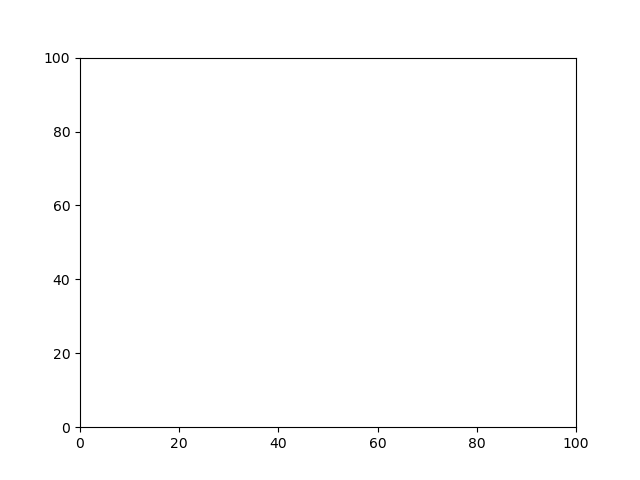

wall collision for 10 at 0.020556080256235083s and position:[98.         80.81951176]
wall collision for 8 at 0.02102417295890584s and position:[ 2.         81.06157028]
wall collision for 3 at 0.025751722245262235s and position:[35.08817297 98.        ]
wall collision for 6 at 0.07218573920040035s and position:[63.37946417 98.        ]
for 2, 5 we have a collision at position[44.04505065 58.63834244] and [47.73901338 60.17281073],dist:3.9999941994014896
for 0, 3 we have a collision at position[23.39082038 82.12942259] and [24.70576957 85.90710276],dist:3.9999948542723596
for 4, 9 we have a collision at position[90.67084708 44.80449281] and [94.01349933 47.00146041],dist:3.999998839999647
for 0, 8 we have a collision at position[15.72314698 79.27537805] and [13.75555891 75.79277168],dist:3.9999937332849784
wall collision for 1 at 0.05030981102815033s and position:[24.82273946 98.        ]
wall collision for 9 at 0.052633398630606024s and position:[98.         40.96216056]
wall collisio

In [1]:


%matplotlib ipympl
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Box dimensions
box_size = 100

# Number of particles
num_particles = 12
particle_radius = 2.0  # Radius of the particles
large_num = 100 # A large number for no collision
epsilon = 1e-5  # Small threshold to avoid repeated collisions

# Time parameters
t_max = 15 # Total simulation time
dt = 0.1     # Time step

# Initialize positions and velocities
np.random.seed(0)  # For reproducibility
positions = np.random.rand(num_particles, 2) * (box_size - 2 * particle_radius) + particle_radius
velocities = (np.random.rand(num_particles, 2) - 0.5) * 15 
print(positions)
# Function to compute the time to the first collision between two particles
def particle_collision_time(pos_i, vel_i, pos_j, vel_j):
    delta_x = pos_j[0] - pos_i[0]
    delta_vx = vel_j[0] - vel_i[0]
    delta_y = pos_j[1] - pos_i[1]
    delta_vy = vel_j[1] - vel_i[1]
    #print(f'delta_x:{delta_x}, delta_y:{delta_y}, delta_vy:{delta_vy}, delta_vx:{delta_vx}')
    a = delta_vx**2 + delta_vy**2
    b = 2 * (delta_x * delta_vx + delta_y * delta_vy)
    c = delta_x**2 + delta_y**2 - 4 * particle_radius**2  # Adjusting for radius
    
    if a == 0:
        return large_num  # Particles moving parallel (no collision)
    
    Delta = b**2 - 4 * a * c
    if Delta < 0:
        return large_num  # No real roots, no collision
    elif Delta == 0:
        t = -b / (2 * a)
        return t if t >= 0 else large_num
    else:
        t1 = (-b + math.sqrt(Delta)) / (2 * a)
        t2 = (-b - math.sqrt(Delta)) / (2 * a)
        if t1 >= 0 and t2 >= 0:
            #print(f'delta>0 and {t1} and {t2}')
            return min(t1, t2)
        elif t1 >= 0:
            return t1
        elif t2 >= 0:
            return t2
        return large_num

# Function to compute the time to collision with the walls
def wall_collision_time(position, velocity):
    times = []
    for i in range(2):  # x and y directions
        if velocity[i] > 0:
            t_wall = (box_size - particle_radius - position[i]) / velocity[i]
        elif velocity[i] < 0:
            t_wall = (particle_radius - position[i]) / velocity[i]
        else:
            t_wall = large_num  # No movement in this direction
        times.append(t_wall)
    
    return min(times)

# Function to find the next collision event
def find_earliest_collision(positions, velocities):
    min_time = large_num
    collision_pair = (-1, -1)  # (-1, -1) means wall collision
    
    # Check particle-particle collisions
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            t_collision = particle_collision_time(positions[i], velocities[i], positions[j], velocities[j])
            if t_collision < min_time:
                min_time = t_collision
                #print(min_time)
                collision_pair = (i, j)
    
    # Check particle-wall collisions
    for i in range(num_particles):
        t_wall = wall_collision_time(positions[i], velocities[i])
        if t_wall < min_time:
            min_time = t_wall
            collision_pair = (i, -1)  # Indicate wall collision for this particle
    
    return min_time, collision_pair
def update_positions(positions, velocities, dt, collision_pair):
    # Update positions
    positions += velocities * dt
    p, q = collision_pair
    #print(f'dist is {np.linalg.norm(positions[p] - positions[q])}')
    #print(positions)
    # Check for boundary collisions and reflect velocities
    for i in range(num_particles):
        for j in range(2):  # x and y directions
            if positions[i, j] <= particle_radius or positions[i, j] >= box_size - particle_radius:
                velocities[i, j] *= -1
                
                #pressure += 1
                positions[i, j] = np.clip(positions[i, j], particle_radius, box_size - particle_radius)
                print(f'wall collision for {i} at {dt}s and position:{positions[i]}')
                #print(f'({i}, {j})position of wall colision {positions[i]} and new v:{velocities[i]}')
    # Check for particle collisions
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            dist = np.linalg.norm(positions[i] - positions[j])
            if dist <= 2 * particle_radius:  # Collision condition
                print(f'for {i}, {j} we have a collision at position{positions[i]} and {positions[j]},dist:{dist}')
                resolve_collision(i, j, positions, velocities)
    positions += velocities * 0.000001
    
    return positions
# Function to resolve the collision (particles or walls)
def resolve_collision(i, j, positions, velocities):
    # Calculate the normal vector
    delta_pos = positions[i] - positions[j]
    dist = np.linalg.norm(delta_pos)
    delta_v = velocities[i] - velocities[j]
    # Normal vector
    n_hat = delta_pos / (dist**2)
    #print(f'dist is {dist}')
    # Relative velocity
    
    
    # Velocity component along the normal direction
    v_rel = np.dot(delta_v, delta_pos)
    
    # Update velocities if particles are moving towards each other
    if v_rel < 0:
        velocities[i] -= v_rel * n_hat
        velocities[j] += v_rel * n_hat
    #print(f'({i},{j}) new i: p:{positions[i]}, v:{velocities[i]}\n and j: p:{positions[j]},v:{velocities[j]}')
    

# t = 0
# while t < t_max:
#     delta_t, collision_pair = find_earliest_collision(positions, velocities)
#     print(f'delta t is {delta_t} and pair:{collision_pair}')
#     delta_t += 0.000001
#     positions = update_positions(positions, velocities, delta_t, collision_pair)
#     t += (delta_t + 0.000001)
#     print(f'delta t is {delta_t}')
    
#Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
particles, = ax.plot([], [], 'bo', ms=10)

def init():
    particles.set_data([], [])
    return particles,

def animate(frame):
    global positions, velocities, dt
    
    # Find the earliest collision
    delta_t, collision_pair = find_earliest_collision(positions, velocities)
    
    # Update positions to the collision time
    if delta_t < dt:
        delta_t += 0.000001
        positions = update_positions(positions, velocities, delta_t, collision_pair)
        #positions = update_positions(positions, velocities, delta_t)
        # positions += velocities * delta_t
        #print(f'colision pair is {collision_pair}')
        #print(delta_t)
        # #print(f'delta t is {delta_t} and poistions {positions}')
        # resolve_collision(collision_pair, positions, velocities)
        # #positions += velocities * 0.001
        # #t += (delta_t + 0.01)
        # #print(f'delta t is {delta_t}')
        dt -= (delta_t + 0.000001)
    else:
        positions = update_positions(positions, velocities, dt, collision_pair)
        dt = 0.1  # Reset time step after each update
    
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Animation
ani = animation.FuncAnimation(fig, animate, frames=int(t_max/dt), init_func=init,
                              interval=20, blit=True, repeat=False)

plt.show()
